# Exercise 1

Six independent observations from a Gaussian distribution $N(\mu, \sigma^{2})$ are given by {1.017, 2.221, 1.416, 0.641, 0.124, 1.728}. If $\sigma=0.75$ is known, find the symmetric confidence intervals for $\mu$ with confidence levels $1-\alpha$ = 0.68, 0.90, and 0.95, respectively.

### Case 1: $\sigma$ is known

In [1]:
%matplotlib inline
import numpy as np
import math
import scipy.stats as stat # extra statistical functions (the basic are included in numpy)
import scipy.optimize as opt # optimization and root finding package 
import scipy.misc as msc
import matplotlib.pyplot as plt

In [74]:
def find_delta(delta, alpha, sigma):
    x = math.erf(delta/(np.sqrt(2)*sigma)) -1 + alpha
    return x



If sigma is known, then:

In [75]:
obs = [1.1017, 2.221, 1.416, 0.641, 0.124, 1.728]
alpha = 1-np.array([0.68, 0.90, 0.95])
sigma_real = 0.75
opt_delta = np.empty(len(alpha))
mu=np.mean(obs)
print "Mu:", mu
print ""

for i in range(len(alpha)):
    opt_delta[i] = opt.fsolve(find_delta, sigma_real, args=(alpha[i],sigma_real))
    print "Delta:", opt_delta[i]
    print 'Interval [mu-delta, mu+delta]', mu-opt_delta[i], mu+opt_delta[i] 


Mu: 1.20528333333

Delta: 0.745843412407
Interval [mu-delta, mu+delta] 0.459439920926 1.95112674574
Delta: 1.23364022021
Interval [mu-delta, mu+delta] -0.0283568868803 2.43892355355
Delta: 1.46997298841
Interval [mu-delta, mu+delta] -0.264689655072 2.67525632174


 ### Case 2: $\sigma$ is unknown. 

If we did not have sigma, we would first estimate it and use this estimate as our actual value. The resulting confidence intervals would be an estimation of the real confidence intervals shown above. The code below takes sigma as the std of the measurements.

In [18]:
obs = [1.1017, 2.221, 1.416, 0.641, 0.124, 1.728]
alpha = 1-np.array([0.68, 0.90, 0.95])
sigma_estimated = np.std(obs)

opt_delta_estimated = np.empty(len(alpha))
mu=np.mean(obs)
print "Mu = %g and Sigma = %g" %(mu, sigma_estimated)
print ""

for i in range(len(alpha)):
    opt_delta_estimated[i] = opt.fsolve(find_delta, sigma_estimated, args=(alpha[i],sigma_estimated))
    
    #if our estimated delta was the true one, our results would match the values in the alpha array.
    print "1-alpha = %.3f" %math.erf(opt_delta_estimated[i]/(np.sqrt(2)*sigma_real)) 
    
    print "Delta = ", opt_delta[i]
    print 'Interval [mu-delta, mu+delta]', mu-opt_delta[i], mu+opt_delta[i] 

Mu = 1.20528 and Sigma = 0.688916

1-alpha = 0.639
Delta =  0.745843412407
Interval [mu-delta, mu+delta] 0.459439920926 1.95112674574
1-alpha = 0.869
Delta =  1.23364022021
Interval [mu-delta, mu+delta] -0.0283568868803 2.43892355355
1-alpha = 0.928
Delta =  1.46997298841
Interval [mu-delta, mu+delta] -0.264689655072 2.67525632174


# Exercise 2

Let's imagine that an LHC experiment measures the number ofe vents produced in a certain decay channel of the Higgs particle. Let's call $\nu$ the expected number of events, assuming there is no background. Then, the probability to measure exactly $N$ events in an experiment is given by the Poisson probability distribution:

$$
P(N,\nu)= \frac{\nu^{N}}{N!} e^{-\nu}
$$

## Part I

Check that $P(N; \nu)$ is properly normalized. Given an observed value of $N (=N_{obs})$, find a frequentist unbiased esitmator for $\nu$. Compute its expected value and variance. _[Hint: compute $<N>$ and $<N(N-1)>$ first.]_

### Normalization
To check wheter a discrete pmf is normalized we have to sum its values for all possible outcomes, in the case of a Poisson, between 0 and $\infty$.

$$\sum_{n=0}^\infty P(n;\nu)= e^{-\nu} \sum_{n=0}^\infty \frac{\nu^{n}}{n!} = e^{-\nu} e^{\nu} = 1 $$

where only the Taylor expansion of an exponential needs to be known.

### Unbiased estimator
The maximum likelihood can be used to find an estimator whithin the frequentist interpretation of probability, and in many cases it is unbiased. Starting from the likelihood of $m$ observations:

$$
L(\{ N_{i}\} ;\nu)=\prod_{i=1}^{m}\frac{\nu^{N_{i}}}{N_{i}!}e^{-\nu}=e^{-\nu m}\prod_{i=1}^{m}\frac{\nu^{N_{i}}}{N_{i}!} \\
l(\{ N_{i}\} ;\nu)=-\log L(\{ N_{i}\} ;\nu)=-(-\nu_{m}+\sum_{i=1}^{m} N_{i}\log\nu-\sum_{i=1}^{m} \log N_{i}!)=\nu_{m}-\sum_{i=1}^{m} N_{i}\log\nu-\sum_{i=1}^{m} \log N_{i}!
$$

once the likelihood and the log likelihood are known, it can be maximized with respect to the parameter that wants to be estimated in order to find the estimator:

$$
\frac{\partial P}{\partial\nu}\bigg\rvert_{\nu=\hat{\nu}ML}=m-\sum\frac{N_{i}}{\hat{\nu}_{ML}}=0 \quad \rightarrow \quad \hat{\nu}_{ML}=\frac{1}{m}\sum_{i=1}^{m}N_{i}\\
$$

### Expected value and variance of the estimator
To help afterwards in the calculation of the expected values of the estimator, first some expected values for the poisson distribution will be calculated:

$$E[N]=\sum_{n=0}^\infty nP(n;\nu)= e^{-\nu} \sum_{n=1}^\infty n \frac{\nu^{n}}{n!} = \nu e^{-\nu} \sum_{n=1}^\infty \frac{\nu^{n-1}}{(n-1)!} = \nu e^ {-\nu} \sum_{n=0}^\infty \frac{\nu^{m}}{m!} = \nu e^{-\nu} e^{\nu} = \nu$$ 

Note that the fisrt term of the sum has $n=0$, therefore it is zero and can be removed from the sum. Therefore, by taking common factor of $\nu$ and changing the index of the sum to $m=n-1$ (and thus changing the limits to $m=0$ to $\infty$) the Taylor expension of the exponential is obtained again. 

$$E[N(N-1)]= \sum_{n=0}^\infty n(n-1) P(n;\nu)= \sum_{n=2}^\infty n(n-1) \frac{\nu^{n}}{n!} e^{-\nu}= e^{-\nu} \nu^{2} \sum_{n=2}^\infty \frac{\nu^{n-2}}{(n-2)!}= e^{-\nu} \nu^{2}\nu= \nu^{2}$$

$$E[N(N-1)]= E[N^{2}]-E[N] \quad \rightarrow \quad E[N^{2}]= E[N(N-1)]+ E[N]= \nu^{2}+\nu$$

$$Var[N]= E[N^{2}]-\big(E[N]\big)^{2}= \nu^{2}+\nu-\nu^{2}= \nu$$

Therefore, the expected values of the estimator can be easily calculated:

$$
E[\hat{\nu}_{ML}] =E\bigg[\frac{1}{m}\sum_{i=1}^{m} N_{i}\bigg] =\frac{1}{m}\sum_{i=1}^{m} E[N_{i}] =\frac{1}{m}\sum_{i=1}^{m}\nu=\nu.
$$

$$Var[\hat{\nu}_{ML}]= Var[\frac{1}{n} \sum_{i=1}^{N} N_{i}]= \frac{1}{n^{2}} \sum_{i=1}^{n} Var[N_{i}]= \frac{1}{n^{2}} n \nu= \frac{\nu}{n}$$

[Oriol]: Los enunciados y explicaciones teóricas de los apartados II-V están debajo, en el título correspondiente. Sin embargo, os recomiendo muchísimo que cúando ejecuteís las diferentes partes lo hagaís con el código que tiene de título Part II-VII modificando los plots si es necesario, por así evitar que algo previamente definido (y que la notebook no olvida pero los humanos sí que olvidamos) haga que os salgan resultados sin sentido. 

Una alternativa a eso es modificar los nombres para que no haya coincidencias, pero creo que no vale la pena o hacer restart del notebook cada vez que queraís ejecutar código de partes entriores (no celdas sino partes) y volver a ejecutar la primera celda y des de aquí por orden.

## Part II
Assume now that the pdf for the estimator of $\nu$ is a Gaussian. using the expected value and variance computed in part I, plot the Gaussian pdf corresponding to $N_{obs}=150$.

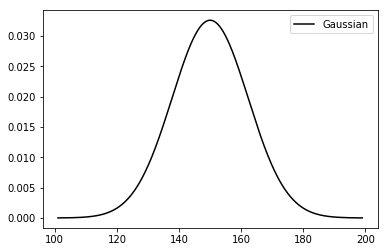

In [19]:
observed_values = np.array([150])
num_observations = len(observed_values)

nu_estimated = np.mean(observed_values)


# Expected gaussian pdf
mu = nu_estimated
sigma = np.sqrt(nu_estimated)
dist = stat.norm(mu, sigma)
x_pdf = np.linspace(mu-4*sigma, mu+4*sigma, 1000)

#Plot distributions
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian')
ax.legend()


## Part III
Let's now construct the pdf for the estimator of $\nu$ using a MC simulation.
 1. Let $q$ be the estimator obtained for $N_{obs}=150$. Generate $10^6$ MC experiments with $\nu=q$. Draw one value of $N(=N_i)$ from each one
 2. For each experiment $i$ use $N_i$ to compute the new estimator $q_i$.
 3. Plot the histogram of values of $q_i$. Compare it with the result of part II. Is it a Gaussian?

The Montecarlo generated distribution has:
	mean = 149.982925,
	variance = 150.272733,
	skewness = 0.080780
	and kurtosis = 0.004414


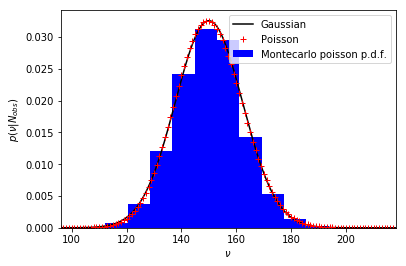

In [23]:
poisson = stat.poisson(nu_estimated)
N = 10**6
mc_sample = poisson.rvs(N)
x_pdf = np.linspace(min(mc_sample)*.8, max(mc_sample)*1.2, 1000)
x_pmf = np.arange(min(mc_sample), max(mc_sample)) # We use the pmf because the 
                                            # Poisson takes discrete values
mu=np.mean(mc_sample)
variance =np.var(mc_sample) # equivalent to np.sqrt(np.var(nu_mc_sample))
skewness = stat.skew(mc_sample)
kurtosis=stat.kurtosis(mc_sample)

print 'The Montecarlo generated distribution has:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu, variance, skewness, kurtosis)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f.')
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian')
ax.plot(x_pmf, poisson.pmf(x_pmf), 'r+', label = 'Poisson')
ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend()

## Note: Useful integral
From here on, intensive use of the following integral formula from wikipedia will be used:
$$
\int_{0}^{\infty} x^{n}e^{-ax}dx = \frac{n!}{a^{n+1}} \quad n\in \mathbb{N}
$$

## Part IV
Assuming a prior for $\nu$ uniform between 0 and infinity, compute the Bayesian posterior pdf for $\nu$. Note that it is not a Gaussian. Plot the PDF for $N_{\text{obs}}$ and compare it with the results in II and III.

### Posterior calculation (linear prior)
Before calculating the posterior, the three terms involved in its calculation will be specified. For simplicity, from now on everything will be constrained to $m=1$.

$$
L(N ;\nu)=\frac{\nu^{N}}{N!}e^{-\nu}
$$

$$
\Pi(\nu)= 
\begin{cases}
0 & \nu<0 \\
c & \nu>0
\end{cases}
$$

$$
\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu = \int_{0}^{\infty} \frac{\nu^{N}}{N!}e^{-\nu} c d\nu = \frac{c}{N!} \int_{0}^{\infty} \nu^{N}e^{-\nu}d\nu = \frac{c}{N!} N! =c 
$$

Therefore, the posterior probability is:

$$
P(\nu;N)=\frac{L(N ;\nu)\Pi(\nu)}{\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu}=
\begin{cases}
0 & \nu<0 \\
\frac{\nu^{N}}{N!}e^{-\nu} & \nu>0
\end{cases}
$$

However, due to the huge powers and exponentials, the computations will be done with the logarithm of $P(\nu;N)$ for $\nu>0$ and eventually exponentiated to plot the real value.

$$ \log\big(P(\nu;N)\rvert_{\nu>0}\big)=-\nu+N\log(\nu)-\log(N!)$$

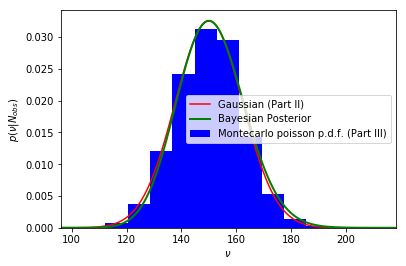

In [25]:
nu_pdf = np.linspace(min(mc_sample)*.8, max(mc_sample)*1.2, 1000)
Nobs = observed_values[0]

# nu_posterior = np.exp(-nu_pdf )*(nu_pdf**observed_values/msc.factorial(observed_values)) --> Treballarem amb logs per evitar overflow

log_nu_posterior = -nu_pdf + Nobs*np.log(nu_pdf) - np.log(msc.factorial(Nobs))
nu_posterior = np.exp(log_nu_posterior)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_pdf, dist.pdf(x_pdf), '-r', label = 'Gaussian (Part II)')
ax.hist(mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f. (Part III)')
ax.plot(nu_pdf, nu_posterior, 'g', lw=2, label = 'Bayesian Posterior')
#ax.plot(x_pmf, poisson.pmf(x_pmf), 'r', label = 'Poisson')

ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend()

## Part V
Let's now construc the Bayesian posterior pdf for $\nu$ using a MC simulation:
 1. Generate $10^7$ values for $\nu$ drawn from a uniform distribution between 0 and a large number (for instance, $N_{obs}+10\sqrt{N_{obs}}$). This is our prior pdf.
 2. For each value of $\nu$ generate one value of $N$ according to a Poisson distribution with parameter $\nu$
 3. If $N=N_{obs}$ keep the value of $\nu$. Otherwise, discard.
 4. Plot the histogram of the values of $\nu$ that have been kept. Is it a Gaussian?
 5. Compute the sample mean and the variance from the histogram of $\nu$. Plot a Gaussian of these mean and variance. Compare to section V.4.

[Oriol]: Note that $N_{obs}+10\sqrt{N_{obs}}\approx \mu+10\sigma$

In [26]:
N=10**7
nu_rndm = np.random.random(N)*(Nobs+10*np.sqrt(Nobs))
poisson = stat.poisson(nu_rndm)
N_mc = poisson.rvs(N) #We'll draw a sample from N_mc 
nu_mc_sample = nu_rndm[N_mc==Nobs] # Solo nos quedamos con los valores de nu en nu_rndm con los que al generar la Poisson, 
                                    # nos han dado, en el primer intento, que el de N_mc es igual a N_obs

(D)

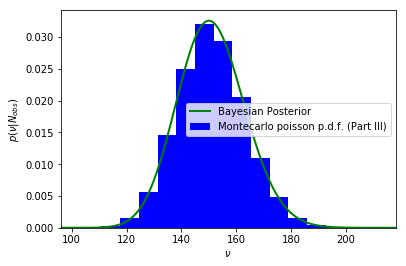

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(nu_mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f. (Part III)')
ax.plot(nu_pdf, nu_posterior, 'g', lw=2, label = 'Bayesian Posterior')

ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend() 

In [28]:
print len(nu_mc_sample) #this is the number of values that we select from N_mc sample

36403


(E)

In [29]:
mu=np.mean(nu_mc_sample)
variance =np.var(nu_mc_sample) # equivalent to np.sqrt(np.var(nu_mc_sample))
skewness = stat.skew(nu_mc_sample)
kurtosis=stat.kurtosis(nu_mc_sample)

print 'The Montecarlo generated distribution has:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu, variance, skewness, kurtosis)

The Montecarlo generated distribution has:
	mean = 150.888316,
	variance = 151.422601,
	skewness = 0.148868
	and kurtosis = 0.015276


## Part VI
Repeat for $N_{obs}=10$

## Part VII
Repeat for $N_{obs}=1$

## Parts II-VII

Las dos celdas que siguen sirven para haver los apartados II-V, VI i VII de manera sintetizada. 

[Oriol]: Debajo, los plots se pueden pesonalizar a gusto, jugando con el numero y posición de los subplots y en qué subplot está cada gráfico. Los tres numeros de los subplots definen una cuadrícula y una posición en esa cuadrícula. La posición dentro de la cuadrícula tiene que ser menor o igual al producto de los dos primeros números. Para ejemplos podéis mirar los plots tal y como están ahora.

In [2]:
Nobs = 10
nu_grid = np.linspace(Nobs-4*np.sqrt(Nobs), Nobs+6*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV
log_nu_posterior_lin = -nu_grid + Nobs*np.log(nu_grid) - np.log(msc.factorial(Nobs))
nu_posterior_lin = np.exp(log_nu_posterior_lin)

# Part V
N_V_lin=10**7
nu_prior_lin = np.random.random(N_V_lin)*(Nobs+10*np.sqrt(Nobs))
poisson_V_lin = stat.poisson(nu_prior_lin)
N_mc_lin = poisson_V_lin.rvs(N_V_lin) #We'll draw a sample from N_mc 
mc_sample_V_lin = nu_prior_lin[N_mc_lin==Nobs]
print len(mc_sample_V_lin)

# Part V.E)
mu_VE_lin = np.mean(mc_sample_V_lin)
sigma_VE_lin = np.std(mc_sample_V_lin)
gaussian_VE_lin = stat.norm(mu_VE_lin, sigma_VE_lin)

C:\Users\Oriol\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


240272


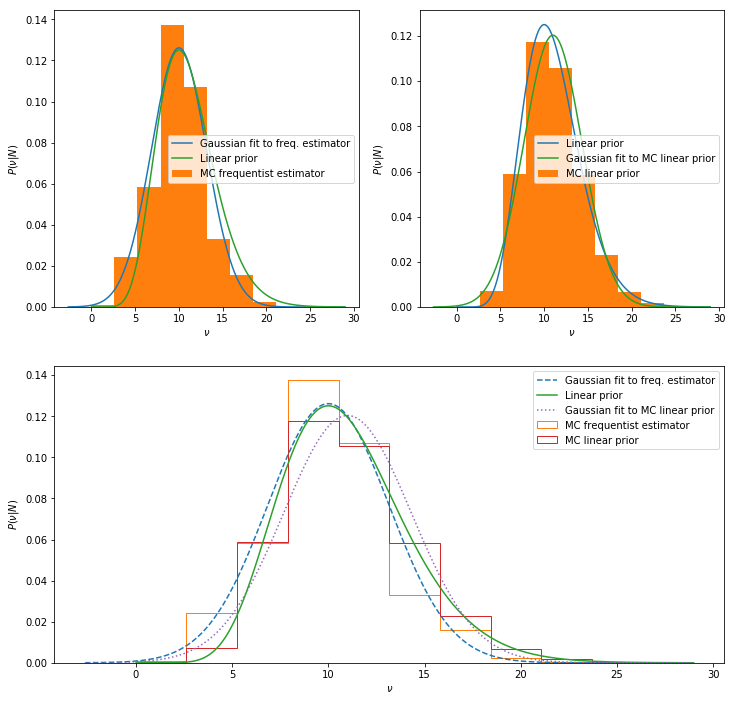

In [3]:
rng = [nu_grid[0], nu_grid[-1]]
Nbins = 12
#Nbins = np.arange(-4.5,10.5) # For the case Nobs = 1, to have bins centered at each integer value. 
                             # For other Nobs, it's bettter to comment it.

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(nu_grid,gaussian_II.pdf(nu_grid), label='Gaussian fit to freq. estimator')
ax1.hist(mc_sample_III, normed=1, range=rng, bins=Nbins, label='MC frequentist estimator')
ax1.plot(nu_grid,nu_posterior_lin, label='Linear prior')

ax2.plot(nu_grid,nu_posterior_lin, label='Linear prior')
ax2.hist(mc_sample_V_lin, normed=1, range=rng, bins=Nbins, label='MC linear prior')
ax2.plot(nu_grid,gaussian_VE_lin.pdf(nu_grid), label='Gaussian fit to MC linear prior')

ax3.plot(nu_grid,gaussian_II.pdf(nu_grid), '--', label='Gaussian fit to freq. estimator')
ax3.hist(mc_sample_III, normed=1, range=rng, bins=Nbins, histtype="step", label='MC frequentist estimator')
ax3.plot(nu_grid,nu_posterior_lin, label='Linear prior')
ax3.hist(mc_sample_V_lin, normed=1, range=rng, bins=Nbins, histtype="step", label='MC linear prior')
ax3.plot(nu_grid,gaussian_VE_lin.pdf(nu_grid), ':', label='Gaussian fit to MC linear prior')

# Trick to set all labels for all axes to the same names and values
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.set_xlabel(r'$\nu$')
    ax.set_ylabel(r'$P(\nu|N)$')
    ax.legend(loc='best')

In [34]:
mu_V =np.mean(mc_sample_V_lin)
variance_V =np.var(mc_sample_V_lin) # equivalent to np.sqrt(np.var(mc_sampleV))
skewness_V = stat.skew(mc_sample_V_lin)
kurtosis_V=stat.kurtosis(mc_sample_V_lin)

print ('the moments for the MC simulatiom with linear prior are:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_V, variance_V, skewness_V, kurtosis_V))

mu_III=np.mean(mc_sample_III)
variance_III =np.var(mc_sample_III) # equivalent to np.sqrt(np.var(mc_sample_III))
skewness_III = stat.skew(mc_sample_III)
kurtosis_III=stat.kurtosis(mc_sample_III)

print ('The moments for the MC simulation with N=nu (part III):\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_III, variance_III, skewness_III, kurtosis_III))

the moments for the MC simulatiom with linear prior are:
	mean = 10.997275,
	variance = 11.024869,
	skewness = 0.610660
	and kurtosis = 0.554757
The moments for the MC simulation with N=nu (part III):
	mean = 10.000800,
	variance = 9.992303,
	skewness = 0.319068
	and kurtosis = 0.112685


## Part VIII
Repeat steps IV to VII using now a prior for $\nu$ uniform in $\log\nu$. Compare to the previous results.

A constant prior in $\log\nu$ implies:

$$ \Pi(\nu)d\log\nu=c d\log\nu=\frac{c}{\nu} d\nu$$

In our case:

$$
\Pi(\nu)= 
\begin{cases}
0 & \nu<0 \\
\frac{c}{\nu} & \nu>0
\end{cases}
$$

The likelihood is the same as for the linear case:

$$L(N ;\nu)=\frac{\nu^{N}}{N!}e^{-\nu}$$

Therefore, the normalization factor becomes:

$$
\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu = \int_{0}^{\infty} \frac{\nu^{N}}{N!}e^{-\nu} \frac{c}{\nu} d\nu = \frac{c}{N!} \int_{0}^{\infty} \nu^{N-1}e^{-\nu}d\nu = \frac{c}{N!} (N-1)! = \frac{c}{N}
$$

Therefore, the posterior probability is:

$$
P(\nu;N)=\frac{L(N ;\nu)\Pi(\nu)}{\int_{-\infty}^{\infty} L(N ;\nu) \Pi(\nu) d\nu}=
\begin{cases}
0 & \nu<0 \\
\frac{\nu^{N}}{N!}e^{-\nu}\frac{c}{\nu}\frac{N}{c}=\frac{\nu^{N-1}}{(N-1)!}e^{-\nu} & \nu>0
\end{cases}
$$

However, like in the linear case, due to the huge powers and exponentials, the computations will be done with the logarithm of $P(\nu;N)$ for $\nu>0$ and eventually exponentiated to plot the real value.

$$ \log\big(P(\nu;N)\rvert_{\nu>0}\big)=-\nu+(N-1)\log(\nu)-\log\big((N-1)!\big)$$


### Simulating with an improper prior
For the linear case, we have easily solved the problem of the improper prior because generating a uniform sample is really easy, and the only trick used was to make it between 0 and $N_{obs}+10\sqrt{N_{obs}}$. Now, generating  a sample following this prior is not that simple, and it has to be done either by try-reject or inverse sampling. 

Due to the shape of the pdf filling a ridiculously small area of any square containing it, the try-reject was discarded.

Inversion sampling does not require a finite box, but in this case, as it does require the cdf and it is an improper pdf, the range of the prior has been limited to $\nu\in[{\nu_{LIM}}^{-1},\nu_{LIM}]$, being $\nu_{LIM}=N_{obs}+10\sqrt{N_{obs}}$. Therefore:

$$\int_{{\nu_{LIM}}^{-1}}^{\nu_{LIM}} \frac{c}{\nu} d\nu = c \Big[\log \nu \Big]_{{\nu_{LIM}}^{-1}}^{\nu_{LIM}} = 2c\log\nu_{LIM} \quad \Rightarrow \quad c=\frac{1}{2\log\nu_{LIM}}$$

And the cdf is:

$$ F_\Pi(\nu)= \int_{{\nu_{LIM}}^{-1}}^{\nu} \frac{c}{x} dx = c \Big[\log x \Big]_{{\nu_{LIM}}^{-1}}^{\nu} = c(\log\nu+\log\nu_{LIM})$$

whose invertion in order to do inverse sampling is:

$$ r = c(\log\nu+\log\nu_{LIM}) \quad \rightarrow \quad \frac{r}{c}-\log\nu_{LIM}= \log\nu\\ 
F_\Pi^{-1}(r)=\nu = \frac{1}{\nu_{LIM}}e^{\frac{r}{c}} = \frac{1}{\nu_{LIM}}e^{2r\log\nu_{LIM}}$$




In [31]:
Nobs = 10
nu_grid = np.linspace(Nobs-5*np.sqrt(Nobs), Nobs+6*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV
log_nu_posterior_log = -nu_grid + (Nobs-1)*np.log(nu_grid) - np.log(msc.factorial(Nobs-1))
nu_posterior_log = np.exp(log_nu_posterior_log)

# Part V
N_V_log=10**6
nu_lim = Nobs+10*np.sqrt(Nobs)
r_prior_log = np.random.random(N_V_log)
nu_prior_log = np.exp(2*r_prior_log*np.log(nu_lim))/nu_lim
poisson_V_log = stat.poisson(nu_prior_log)
N_mc_log = poisson_V_log.rvs(N_V_log) #We'll draw a sample from N_mc 
mc_sample_V_log = nu_prior_log[N_mc_log==Nobs]

# Part V.E)
mu_VE_log = np.mean(mc_sample_V_log)
sigma_VE_log = np.std(mc_sample_V_log)
gaussian_VE_log = stat.norm(mu_VE_log, sigma_VE_log)

C:\Users\Oriol\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


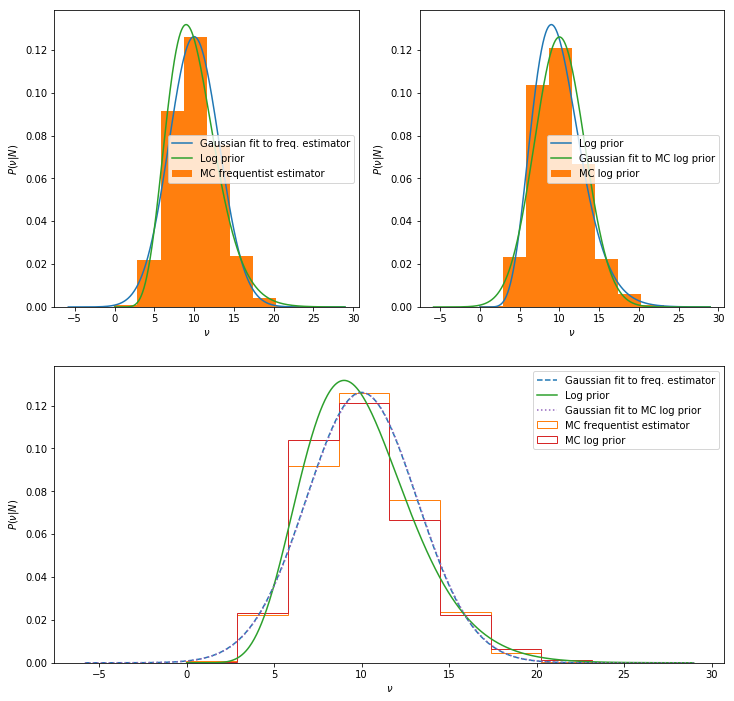

In [32]:
rng = [nu_grid[0], nu_grid[-1]]
Nbins = 12
#Nbins = np.arange(-4.5,10.5) # For the case Nobs = 1, to have bins centered at each integer value. 
                             # For other Nobs, it's bettter to comment it.

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(nu_grid,gaussian_II.pdf(nu_grid), label='Gaussian fit to freq. estimator')
ax1.hist(mc_sample_III, normed=1, range=rng, bins=Nbins, label='MC frequentist estimator')
ax1.plot(nu_grid,nu_posterior_log, label='Log prior')

ax2.plot(nu_grid,nu_posterior_log, label='Log prior')
ax2.hist(mc_sample_V_log, normed=1, range=rng, bins=Nbins, label='MC log prior')
ax2.plot(nu_grid,gaussian_VE_log.pdf(nu_grid), label='Gaussian fit to MC log prior')

ax3.plot(nu_grid,gaussian_II.pdf(nu_grid), '--', label='Gaussian fit to freq. estimator')
ax3.hist(mc_sample_III, normed=1, histtype="step", range=rng, bins=Nbins, label='MC frequentist estimator')
ax3.plot(nu_grid,nu_posterior_log, label='Log prior')
ax3.hist(mc_sample_V_log, normed=1, histtype="step", range=rng, bins=Nbins, label='MC log prior')
ax3.plot(nu_grid,gaussian_VE_log.pdf(nu_grid), ':', label='Gaussian fit to MC log prior')

# Trick to set all labels for all axes to the same names and values
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.set_xlabel(r'$\nu$')
    ax.set_ylabel(r'$P(\nu|N)$')
    ax.legend(loc='best')

In [33]:
mu_V =np.mean(mc_sample_V_log)
variance_V =np.var(mc_sample_V_log) # equivalent to np.sqrt(np.var(mc_sampleV))
skewness_V = stat.skew(mc_sample_V_log)
kurtosis_V=stat.kurtosis(mc_sample_V_log)

print ('the moments for the MC simulatiom with log prior are:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_V, variance_V, skewness_V, kurtosis_V))

mu_III=np.mean(mc_sample_III)
variance_III =np.var(mc_sample_III) # equivalent to np.sqrt(np.var(mc_sample_III))
skewness_III = stat.skew(mc_sample_III)
kurtosis_III=stat.kurtosis(mc_sample_III)

print ('The moments for the MC simulation with N=nu (part III):\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_III, variance_III, skewness_III, kurtosis_III))

the moments for the MC simulatiom with log prior are:
	mean = 10.024764,
	variance = 10.027313,
	skewness = 0.643798
	and kurtosis = 0.674642
The moments for the MC simulation with N=nu (part III):
	mean = 10.000800,
	variance = 9.992303,
	skewness = 0.319068
	and kurtosis = 0.112685


The theoretical moments of the posterior for a logarithmic prior:

$$
Mean \rightarrow E[\nu] = N \\
Variance \rightarrow Var[\nu] = N \\
Skewness \rightarrow \gamma_1=\frac{2}{\sqrt{N}}
$$

The theoretical moments ofthe posterior for a linear prior:
$$
Mean \rightarrow E[\nu] = N +1 \\
Variance \rightarrow Var[\nu] = N +1 \\
Skewness \rightarrow \gamma_1=\frac{2}{\sqrt{N +1}}
$$


### Comparison between priors

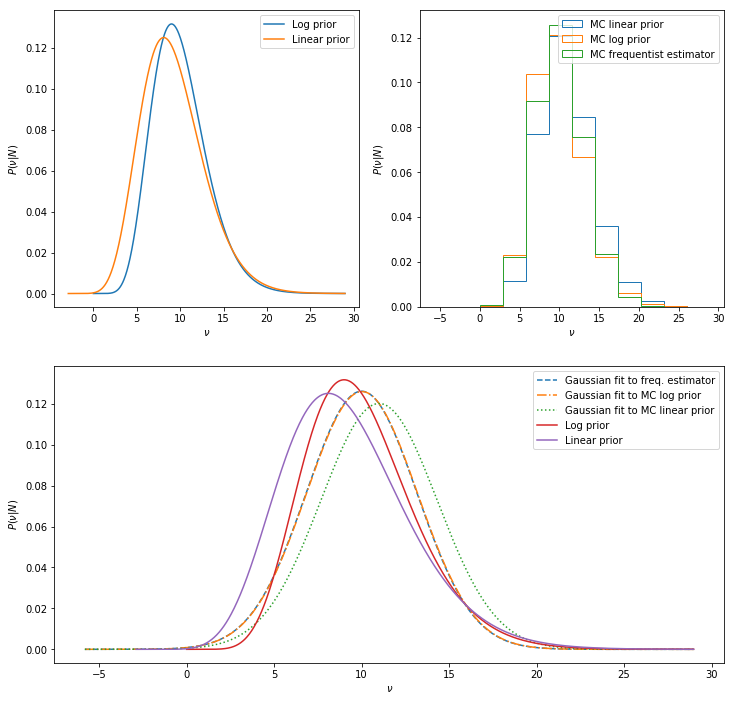

In [38]:
rng = [nu_grid[0], nu_grid[-1]]
Nbins = 12
#Nbins = np.arange(-4.5,10.5) # For the case Nobs = 1, to have bins centered at each integer value. 
                             # For other Nobs, it's bettter to comment it.

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(nu_grid,nu_posterior_log, label='Log prior')
ax1.plot(nu_grid,nu_posterior_lin, label='Linear prior')

ax2.hist(mc_sample_V_lin, normed=1, histtype="step", range=rng, bins=Nbins, label='MC linear prior')
ax2.hist(mc_sample_V_log, normed=1, histtype="step", range=rng, bins=Nbins, label='MC log prior')
ax2.hist(mc_sample_III, normed=1, histtype="step", range=rng, bins=Nbins, label='MC frequentist estimator')

ax3.plot(nu_grid,gaussian_II.pdf(nu_grid), '--', label='Gaussian fit to freq. estimator')
ax3.plot(nu_grid,gaussian_VE_log.pdf(nu_grid), '-.', label='Gaussian fit to MC log prior')
ax3.plot(nu_grid,gaussian_VE_lin.pdf(nu_grid), ':', label='Gaussian fit to MC linear prior')
ax3.plot(nu_grid,nu_posterior_log, label='Log prior')
ax3.plot(nu_grid,nu_posterior_lin, label='Linear prior')

# Trick to set all labels for all axes to the same names and values
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.set_xlabel(r'$\nu$')
    ax.set_ylabel(r'$P(\nu|N)$')
    ax.legend(loc='best')

## Part IX
What can you canclude about the similitudes and differences between the frequentist and Bayesian results? What can you conclude about the importance of choosing Jeffrey's prior? ANd about the validity of the gaussian approximations fro the pdf?

La aproximación frequentista da una probabilidad grande para nu < 0, en cambio la aproximacion bayesiana la probabilidad de encontrar nu < 0 es zero. Para ambas aproximaciones, la mean es similar.

